In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [2]:
df = pd.read_csv("data/1-min_2020-06-09_2022-09-02.csv")

In [3]:
df

,sps_zeit,received_time,kessel,ruecklauf,abgas,co2_soll,co2_ist,saugzug_ist,puffer_oben,puffer_unten,...,a_ea_0,a_ea_1,a_ea_2,a_ea_3,a_ea_4,a_phase_0,a_phase_1,a_phase_2,a_phase_3,a_phase_4
0,2020-06-09 17:47:56,2020-06-09 16:43:32.943731,26.9,22.4,13,12,0.0,9000,63.3,42.9,...,1,1,1,0,0,0,0,0,0,0
1,2020-06-09 17:49:48,2020-06-09 16:45:24.995442,26.9,22.4,13,12,0.0,9000,63.3,42.9,...,1,1,1,0,0,0,0,0,0,0
2,2020-06-09 17:50:53,2020-06-09 16:46:29.944035,26.9,22.4,13,12,4.9,9000,63.3,42.8,...,1,1,1,0,0,0,0,0,0,0
3,2020-06-09 17:51:52,2020-06-09 16:47:28.939817,26.9,22.5,13,12,9.5,9000,63.3,42.9,...,1,1,1,0,0,0,0,0,0,0
4,2020-06-09 17:52:51,2020-06-09 16:48:27.938373,26.9,22.5,13,12,8.7,9000,63.3,42.9,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168595,2022-09-02 07:30:57,2022-09-02 07:14:42.291005,23.1,21.8,11,12,0.0,9000,41.4,29.7,...,1,1,1,0,0,0,0,0,0,0
1168596,2022-09-02 07:31:56,2022-09-02 07:15:41.28958,23.1,21.8,11,12,0.0,9000,41.4,34.3,...,1,1,1,0,0,0,0,0,0,0
1168597,2022-09-02 07:32:55,2022-09-02 07:16:40.289253,23.1,21.8,11,12,17.4,9000,41.4,36.1,...,1,1,1,0,0,0,0,0,0,0
1168598,2022-09-02 07:33:54,2022-09-02 07:17:39.2877,23.1,21.8,11,12,4.4,9000,41.4,36.9,...,1,1,1,0,0,0,0,0,0,0


In [4]:
df.drop(["sps_zeit", "betriebsphase_kessel", "betriebsphase_hk1", "betriebsphase_hk2", "di_0", "di_1", "di_2", "di_3", "a_w_0","a_w_1", "a_w_2","a_w_3","a_ea_0","a_ea_1", "a_ea_2","a_ea_3","a_ea_4","a_phase_0","a_phase_1","a_phase_2","a_phase_3","a_phase_4"], axis=1, inplace=True)
df

,received_time,kessel,ruecklauf,abgas,co2_soll,co2_ist,saugzug_ist,puffer_oben,puffer_unten,platine,aussen,vorlauf_hk1_ist,vorlauf_hk1_soll,vorlauf_hk2_ist,vorlauf_hk2_soll,boiler_1
0,2020-06-09 16:43:32.943731,26.9,22.4,13,12,0.0,9000,63.3,42.9,24.9,14.2,39.9,36.7,25.5,32.4,55.7
1,2020-06-09 16:45:24.995442,26.9,22.4,13,12,0.0,9000,63.3,42.9,24.9,14.2,40.2,36.7,25.5,32.4,55.7
2,2020-06-09 16:46:29.944035,26.9,22.4,13,12,4.9,9000,63.3,42.8,24.9,14.2,37.9,36.7,25.7,32.4,55.4
3,2020-06-09 16:47:28.939817,26.9,22.5,13,12,9.5,9000,63.3,42.9,24.9,14.2,36.0,36.7,25.7,32.4,55.9
4,2020-06-09 16:48:27.938373,26.9,22.5,13,12,8.7,9000,63.3,42.9,24.9,14.2,34.9,36.7,25.5,32.4,55.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168595,2022-09-02 07:14:42.291005,23.1,21.8,11,12,0.0,9000,41.4,29.7,25.7,18.7,24.8,32.3,23.1,29.0,36.6
1168596,2022-09-02 07:15:41.28958,23.1,21.8,11,12,0.0,9000,41.4,34.3,25.7,18.7,24.8,32.3,23.1,29.0,36.6
1168597,2022-09-02 07:16:40.289253,23.1,21.8,11,12,17.4,9000,41.4,36.1,25.7,18.7,24.8,32.3,23.0,29.0,36.4
1168598,2022-09-02 07:17:39.2877,23.1,21.8,11,12,4.4,9000,41.4,36.9,25.7,18.7,24.8,32.3,23.1,29.0,36.4


In [5]:
timestamps = pd.to_datetime(df.pop("received_time"))

In [6]:
timestamps

0         2020-06-09 16:43:32.943731
1         2020-06-09 16:45:24.995442
2         2020-06-09 16:46:29.944035
3         2020-06-09 16:47:28.939817
4         2020-06-09 16:48:27.938373
                     ...            
1168595   2022-09-02 07:14:42.291005
1168596   2022-09-02 07:15:41.289580
1168597   2022-09-02 07:16:40.289253
1168598   2022-09-02 07:17:39.287700
1168599   2022-09-02 07:18:38.286722
Name: received_time, Length: 1168600, dtype: datetime64[ns]

In [7]:
df.index = timestamps

In [8]:
df

,kessel,ruecklauf,abgas,co2_soll,co2_ist,saugzug_ist,puffer_oben,puffer_unten,platine,aussen,vorlauf_hk1_ist,vorlauf_hk1_soll,vorlauf_hk2_ist,vorlauf_hk2_soll,boiler_1
received_time,,,,,,,,,,,,,,,
2020-06-09 16:43:32.943731,26.9,22.4,13,12,0.0,9000,63.3,42.9,24.9,14.2,39.9,36.7,25.5,32.4,55.7
2020-06-09 16:45:24.995442,26.9,22.4,13,12,0.0,9000,63.3,42.9,24.9,14.2,40.2,36.7,25.5,32.4,55.7
2020-06-09 16:46:29.944035,26.9,22.4,13,12,4.9,9000,63.3,42.8,24.9,14.2,37.9,36.7,25.7,32.4,55.4
2020-06-09 16:47:28.939817,26.9,22.5,13,12,9.5,9000,63.3,42.9,24.9,14.2,36.0,36.7,25.7,32.4,55.9
2020-06-09 16:48:27.938373,26.9,22.5,13,12,8.7,9000,63.3,42.9,24.9,14.2,34.9,36.7,25.5,32.4,55.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02 07:14:42.291005,23.1,21.8,11,12,0.0,9000,41.4,29.7,25.7,18.7,24.8,32.3,23.1,29.0,36.6
2022-09-02 07:15:41.289580,23.1,21.8,11,12,0.0,9000,41.4,34.3,25.7,18.7,24.8,32.3,23.1,29.0,36.6
2022-09-02 07:16:40.289253,23.1,21.8,11,12,17.4,9000,41.4,36.1,25.7,18.7,24.8,32.3,23.0,29.0,36.4


2 Week timespan with 2 times heating up in summer: `2021-08-19T15:00:00` - `2021-09-02T15:00:00` \
2 Week timespan with 7 times heating up in winter: `2022-01-02T15:00:00` - `2022-01-16T15:00:00` \
12 hour timespan with 1 time heating up in winter: `2022-01-02T18:00:00` - `2022-01-03T06:00:00`

In [34]:
#two_summer_weeks = (df.index >= '2021-08-19T15:00:00') & (df.index < '2021-09-02T15:00:00')
#two_winter_weeks = (df.index >= '2022-01-02T15:00:00') & (df.index < '2022-01-16T15:00:00')
#twelve_winter_hours = (df.index >= '2022-01-02T18:00:00') & (df.index < '2022-01-03T06:00:00')

two_summer_weeks = lambda table: (table.index >= '2021-08-19T15:00:00') & (table.index < '2021-09-02T15:00:00')
two_winter_weeks = lambda table: (table.index >= '2022-01-02T15:00:00') & (table.index < '2022-01-16T15:00:00')
twelve_winter_hours = lambda table: (table.index >= '2022-01-02T18:00:00') & (table.index < '2022-01-03T06:00:00')

### Before resampling

In [25]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (16, 12)
mpl.rcParams['axes.grid'] = False

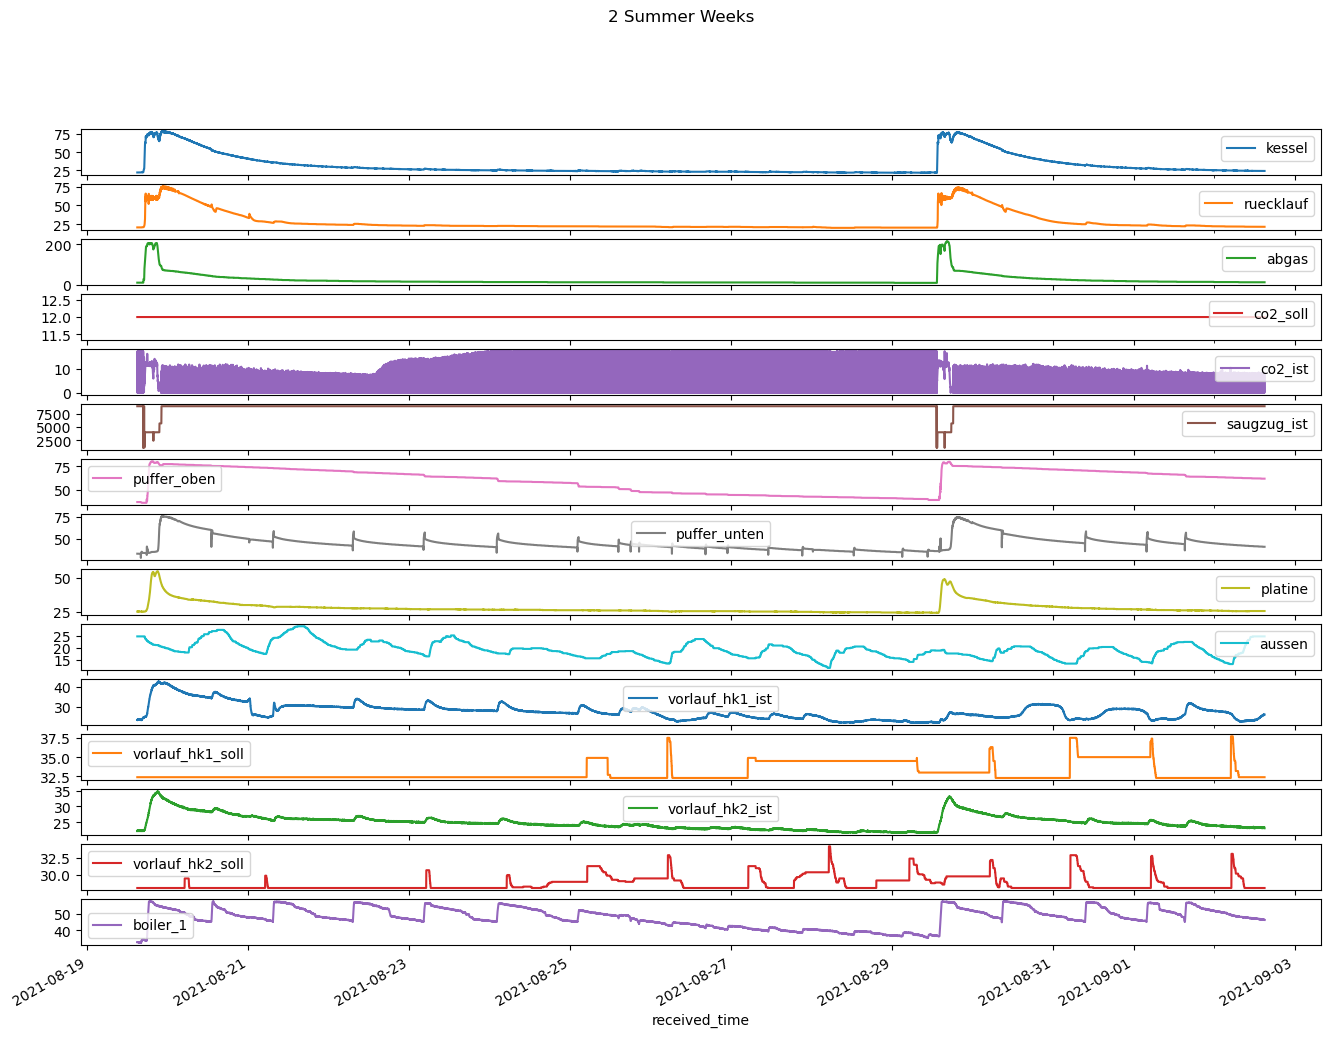

In [36]:
_ = df[two_summer_weeks(df)].plot(subplots=True, title="2 Summer Weeks")

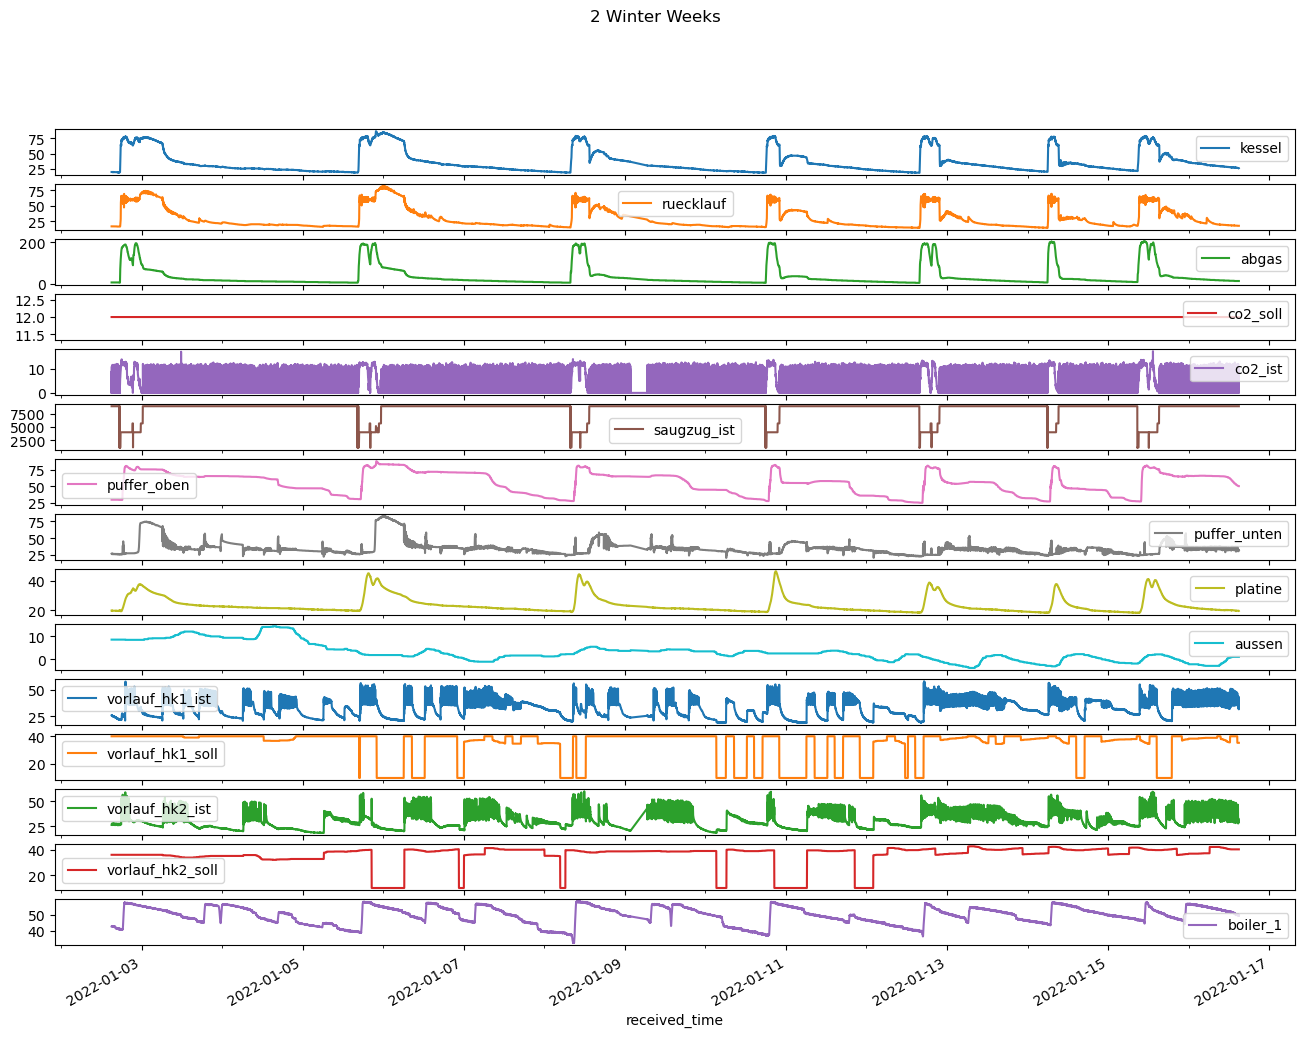

In [ ]:
_ = df[two_winter_weeks(df)].plot(subplots=True, title="2 Winter Weeks")

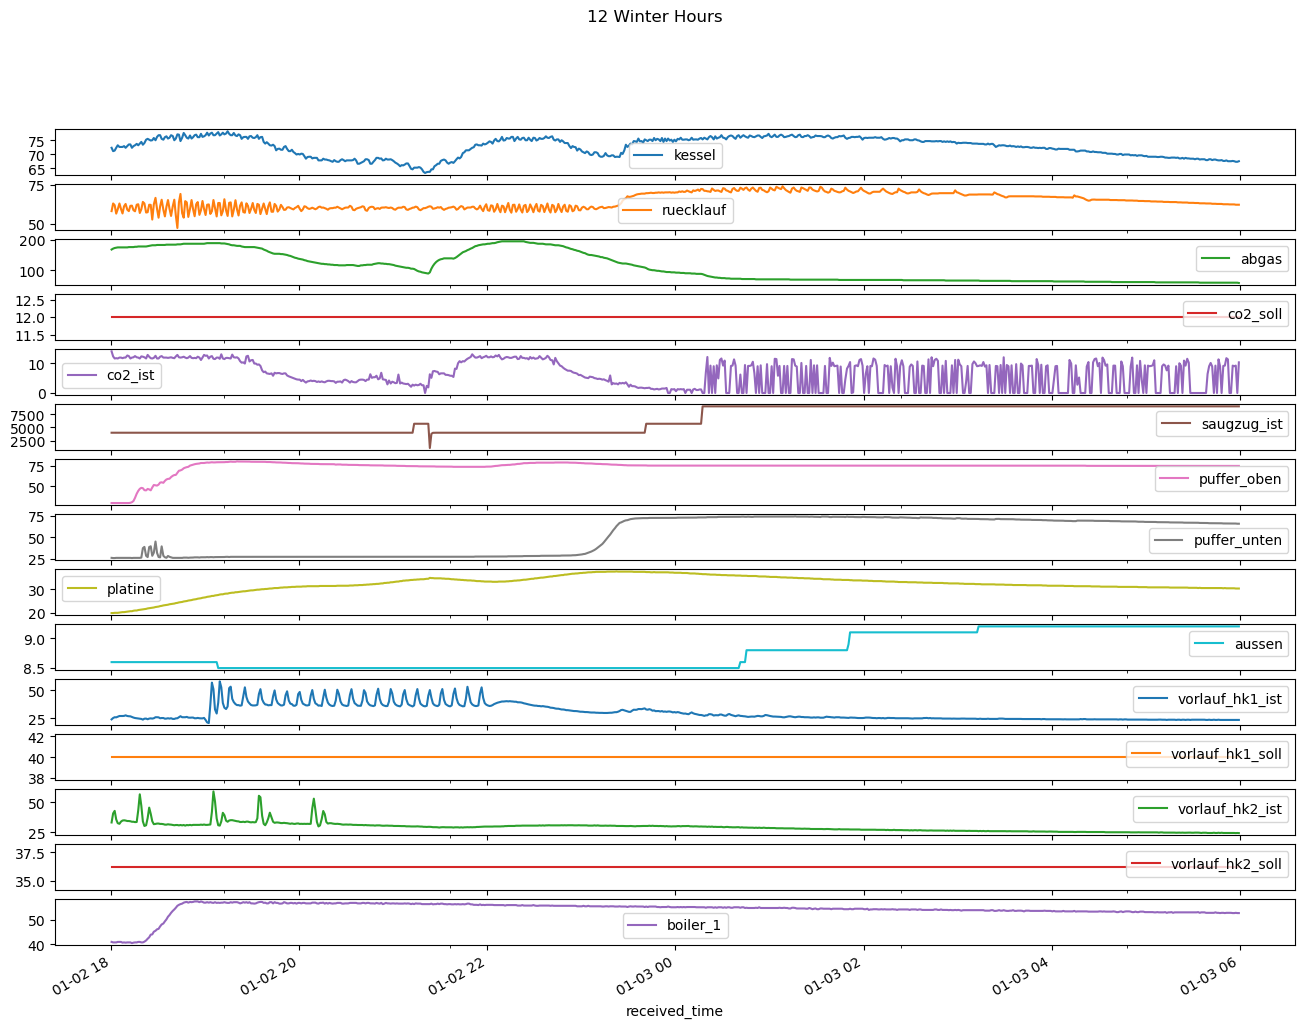

In [46]:
_ = df[twelve_winter_hours(df)].plot(subplots=True, title="12 Winter Hours")

I'm not sure I fully understand the implications of resampling. I want to smooth out the curve and reduce the noise as well as the number of data points. Using a rolling average would incorporate future values in the mean which I understand is bad. Still I'm not sure if what I'm doing here is correct.

In [40]:
resampled = df.resample('3min').mean()
resampled

,kessel,ruecklauf,abgas,co2_soll,co2_ist,saugzug_ist,puffer_oben,puffer_unten,platine,aussen,vorlauf_hk1_ist,vorlauf_hk1_soll,vorlauf_hk2_ist,vorlauf_hk2_soll,boiler_1
received_time,,,,,,,,,,,,,,,
2020-06-09 16:42:00,26.900000,22.400000,13.0,12.0,0.000000,9000.0,63.3,42.900000,24.900000,14.2,39.900000,36.7,25.500000,32.4,55.700000
2020-06-09 16:45:00,26.900000,22.433333,13.0,12.0,4.800000,9000.0,63.3,42.866667,24.900000,14.2,38.033333,36.7,25.633333,32.4,55.666667
2020-06-09 16:48:00,26.933333,22.500000,13.0,12.0,3.233333,9000.0,63.3,42.900000,24.900000,14.2,34.366667,36.7,25.700000,32.4,55.633333
2020-06-09 16:51:00,26.900000,22.400000,13.0,12.0,2.833333,9000.0,63.3,42.733333,24.900000,14.2,33.333333,36.7,25.666667,32.4,55.333333
2020-06-09 16:54:00,26.833333,22.433333,13.0,12.0,2.933333,9000.0,63.3,42.466667,24.900000,14.2,36.366667,36.7,25.766667,32.4,55.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02 07:06:00,23.100000,21.800000,11.0,12.0,7.200000,9000.0,41.4,36.100000,25.733333,18.7,24.800000,32.3,23.100000,29.0,36.700000
2022-09-02 07:09:00,23.100000,21.800000,11.0,12.0,2.633333,9000.0,41.4,36.100000,25.700000,18.7,24.800000,32.3,23.100000,29.0,36.633333
2022-09-02 07:12:00,23.100000,21.800000,11.0,12.0,6.666667,9000.0,41.4,33.966667,25.700000,18.7,24.800000,32.3,23.100000,29.0,36.533333


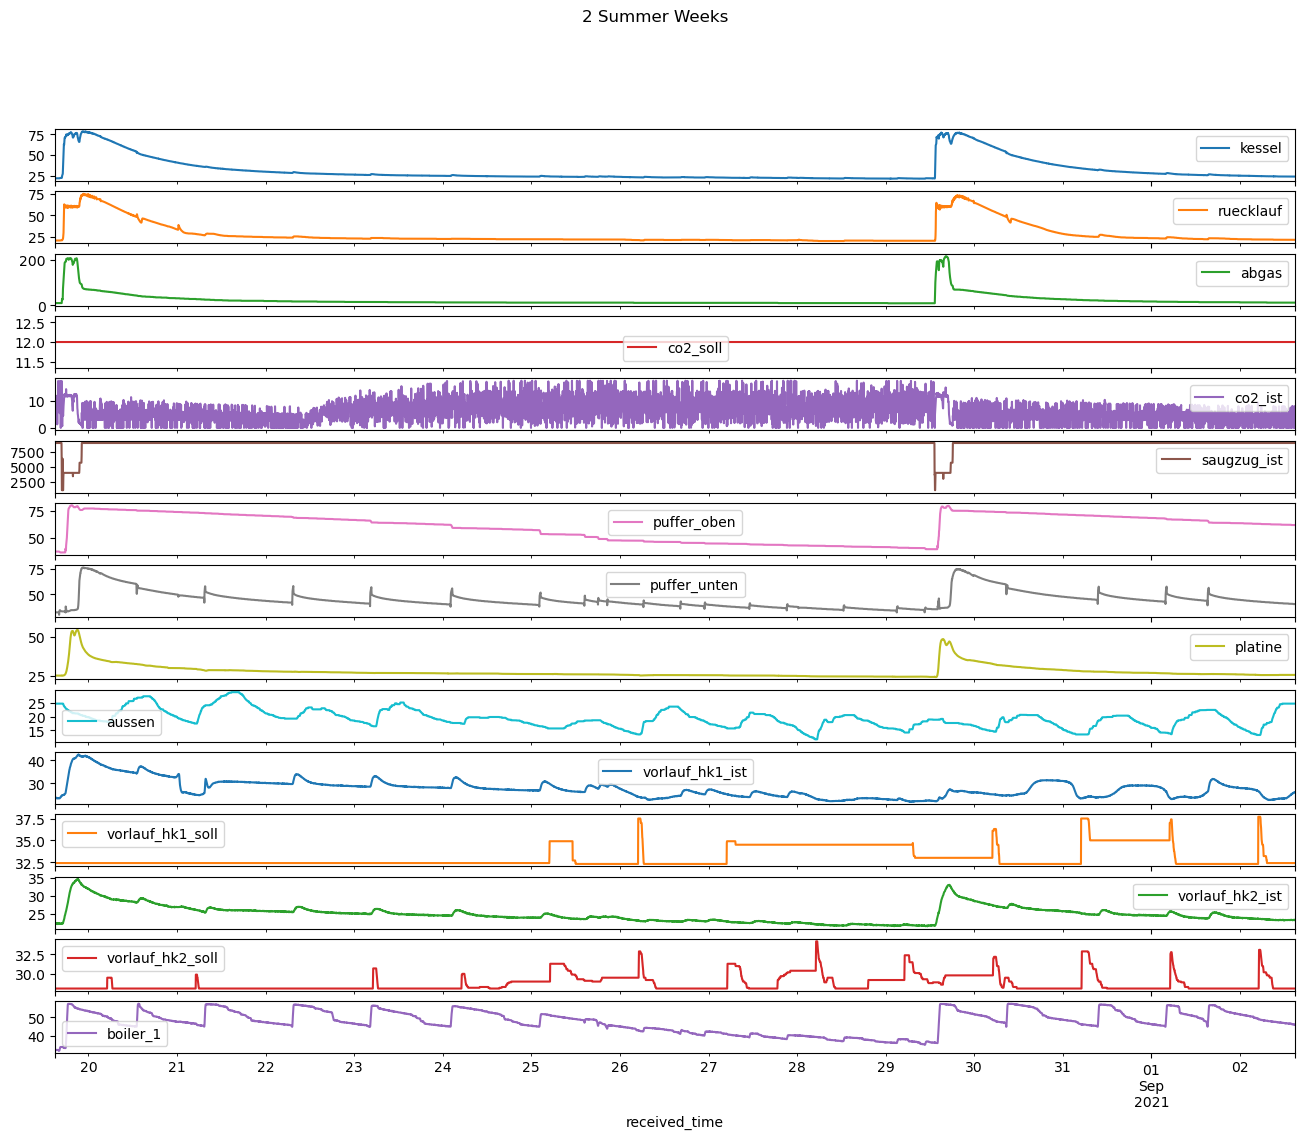

In [41]:
_ = resampled[two_summer_weeks(resampled)].plot(subplots=True, title="2 Summer Weeks")

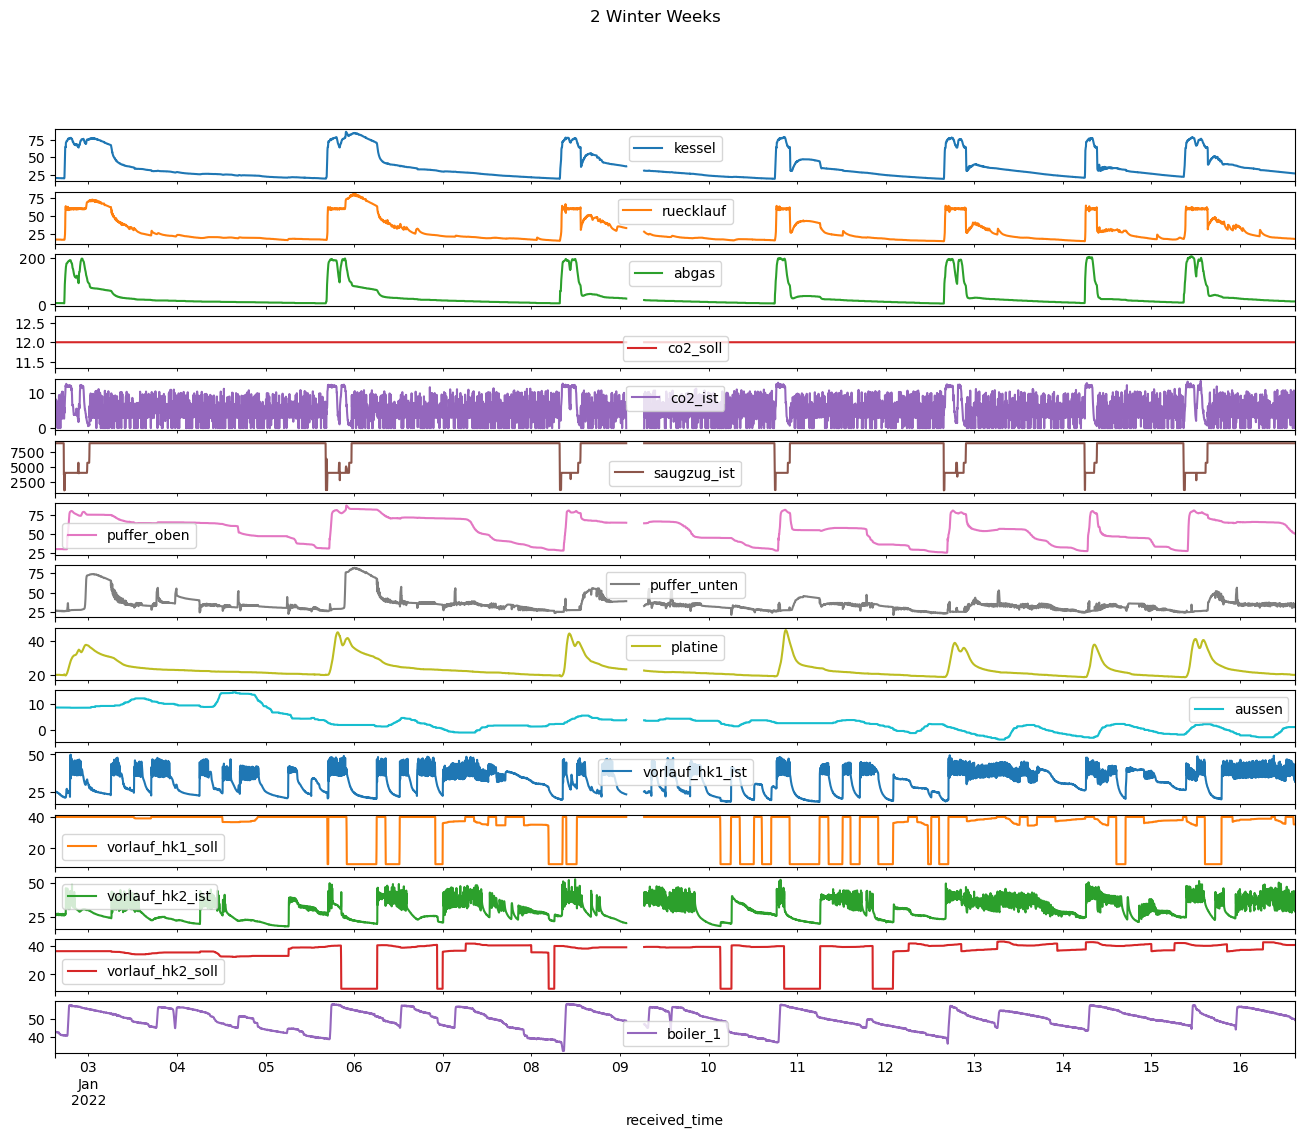

In [42]:
_ = resampled[two_winter_weeks(resampled)].plot(subplots=True, title="2 Winter Weeks")

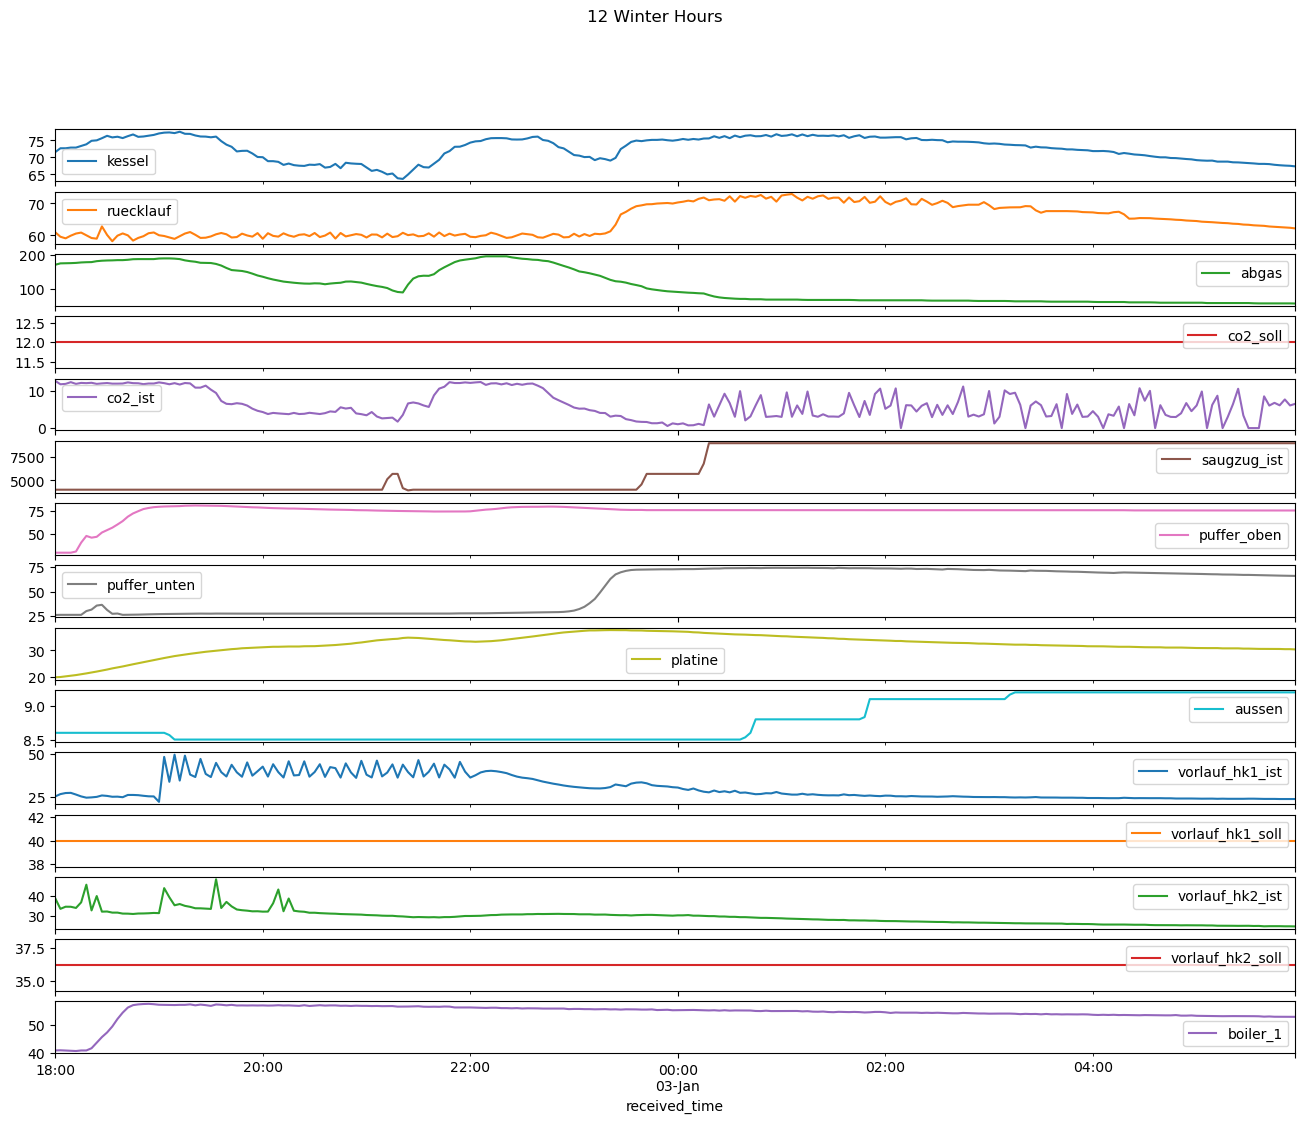

In [45]:
_ = resampled[twelve_winter_hours(resampled)].plot(subplots=True, title="12 Winter Hours")

The summary of the data frame looks plausible :)

In [48]:
resampled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kessel,389745.0,30.606628,13.769996,15.766667,22.800000,25.400000,31.500000,88.866667
ruecklauf,389745.0,26.294762,12.124216,12.400000,19.800000,22.100000,25.800000,85.533333
abgas,389745.0,25.257273,39.453346,0.000000,10.000000,13.000000,20.000000,244.666667
co2_soll,389745.0,12.000000,0.000000,12.000000,12.000000,12.000000,12.000000,12.000000
co2_ist,389745.0,5.634204,3.549773,0.000000,3.000000,5.800000,7.433333,17.500000
saugzug_ist,389745.0,8689.166533,1219.665855,1000.000000,9000.000000,9000.000000,9000.000000,9000.000000
puffer_oben,389745.0,50.634820,14.908355,22.400000,39.600000,49.500000,62.400000,89.300000
puffer_unten,389745.0,36.289670,9.539745,17.866667,29.266667,34.733333,42.300000,86.300000
platine,389745.0,25.244146,4.810650,17.500000,22.100000,24.600000,26.800000,59.000000
aussen,389745.0,13.765533,8.595203,-5.400000,6.400000,13.600000,20.600000,35.800000


In [55]:
timestamp_s = timestamps.map(pd.Timestamp.timestamp)
timestamp_s

0          1.591721e+09
1          1.591721e+09
2          1.591721e+09
3          1.591721e+09
4          1.591721e+09
               ...     
1168595    1.662103e+09
1168596    1.662103e+09
1168597    1.662103e+09
1168598    1.662103e+09
1168599    1.662103e+09
Name: received_time, Length: 1168600, dtype: float64

TODO Since our data contains NaNs, the rfft doesn't work. Need to fill those in somehow, maybe repetition would be a usable way (e.g. check the size of the gap, look back for a period of the same size as the gap (if possible minimizing the difference between start values), and copying that in)

tf.Tensor([nan+nanj nan+nanj nan+nanj ... nan+nanj nan+nanj nan+nanj], shape=(195507,), dtype=complex64)


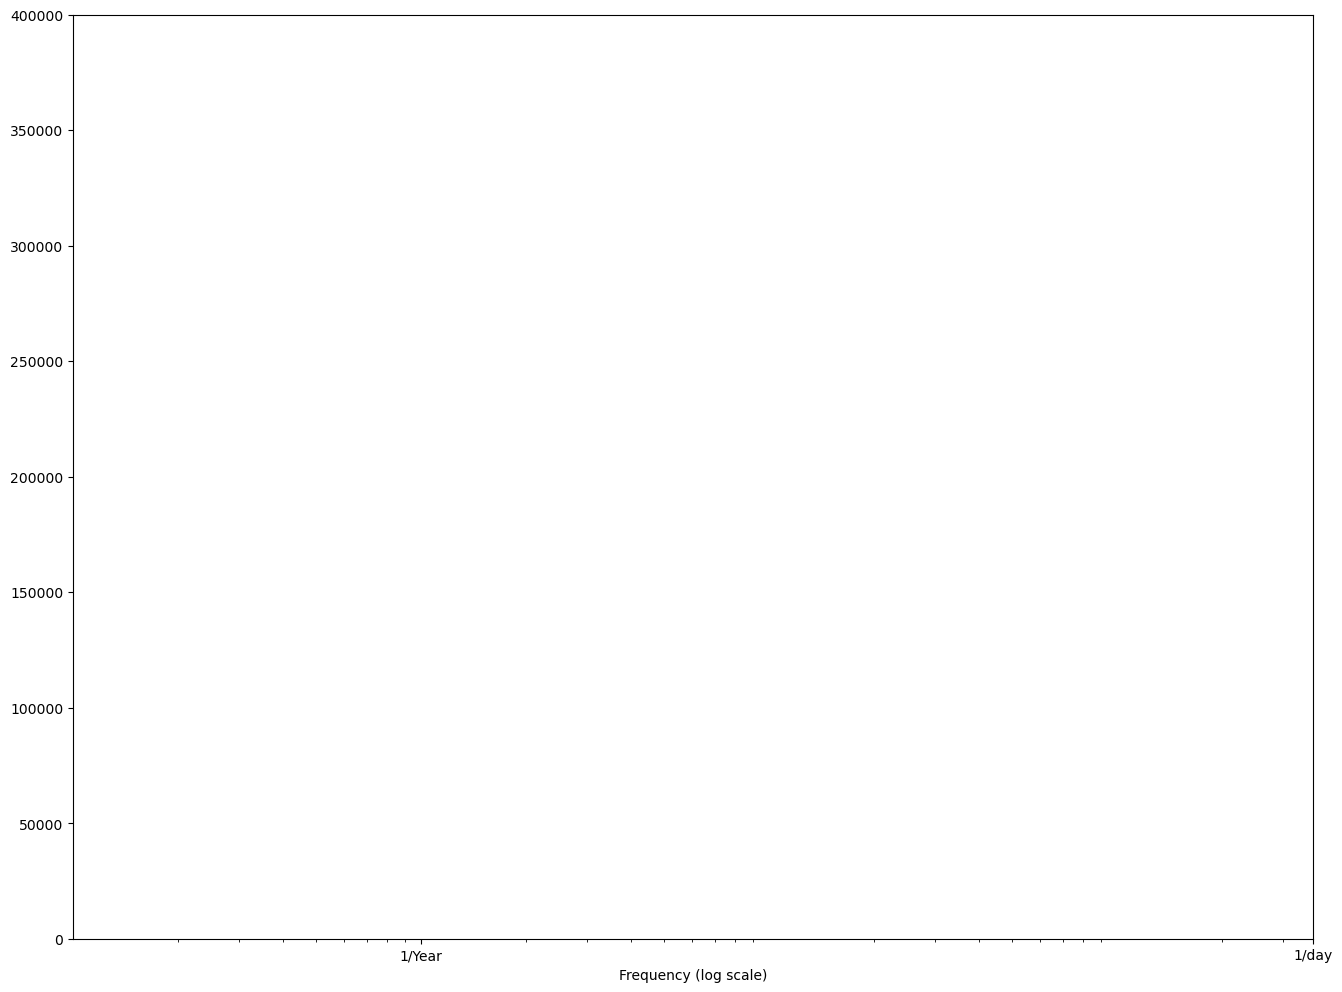

In [54]:
fft = tf.signal.rfft(resampled['boiler_1'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(resampled['boiler_1'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')